# Plot Number of Stations & Number of Events

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [108]:
df=pd.read_csv("PNW_stations.csv")
df.head()

,channel_id,network,station,location,channel,latitude,longitude,elevation,depth,starttime,endtime,sampling_rate,azimuth
0,1,1D,4001,--,DPZ,46.1666,-122.189,0.0,0.0,1.388534e+09,1.418429e+09,250.0,NaN
1,2,1D,4003,--,DPZ,46.1665,-122.184,0.0,0.0,1.388534e+09,1.418429e+09,250.0,NaN
2,3,1D,4004,--,DPZ,46.1646,-122.182,402.4,0.0,1.388534e+09,1.418429e+09,250.0,NaN
3,4,1D,4005,--,DPZ,46.1627,-122.182,1276.2,0.0,1.388534e+09,1.418429e+09,250.0,NaN
4,5,1D,4006,--,DPZ,46.1609,-122.180,0.0,0.0,1.388534e+09,1.418429e+09,250.0,NaN


In [109]:
# mtsthelens location

lat0=46.20047
lon0=-122.18884
    
df['dist'] = np.sqrt((df["latitude"]-lat0)**2 + (df["longitude"]-lon0)**2)*111.25

In [110]:
df2 = df[df["dist"]<10] # keep only stations closer than 10km

In [119]:
nr_stations = []
for yr in range(1980,2023):
    df3 = df2[(df2['starttime'] <= datetime.datetime(yr+1,1,1).replace(tzinfo=datetime.timezone.utc).timestamp()) & (df2['endtime'] >= datetime.datetime(yr,1,1).replace(tzinfo=datetime.timezone.utc).timestamp())]
    nr_stations.append(len(df3['station'].unique()))

In [159]:
idx = []
for yr in range(1980,2023):
    idx.append(datetime.datetime(yr,1,1))

In [160]:
type(idx[0])

datetime.datetime

In [165]:
df_yr = pd.DataFrame(index=range(1980,2023))
#df_yr.index = pd.to_datetime(df_yr.index).date
df_yr['nr_stations'] = nr_stations
df_yr

,nr_stations
1980,9
1981,12
1982,10
1983,9
1984,8
1985,11
1986,11
1987,9
1988,8
1989,8


Text(0, 0.5, 'Number of Stations')

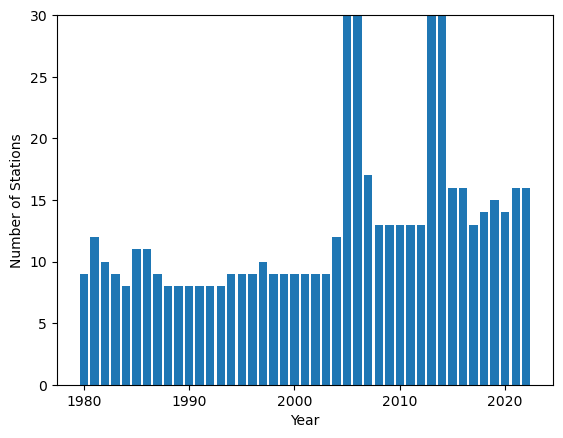

In [166]:
plt.bar(df_yr.index, df_yr['nr_stations'])
plt.ylim(0,30)
plt.xlabel('Year')
plt.ylabel('Number of Stations')

In [167]:
df_yr_new = pd.DataFrame(index=idx)
#df_yr.index = pd.to_datetime(df_yr.index).date
df_yr_new['nr_stations'] = nr_stations
df_yr_new

,nr_stations
1980-01-01,9
1981-01-01,12
1982-01-01,10
1983-01-01,9
1984-01-01,8
1985-01-01,11
1986-01-01,11
1987-01-01,9
1988-01-01,8
1989-01-01,8


In [126]:
df = pd.read_csv("pnsn_catalog_mtsthelens_50km.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.head()

,Number_of_Events
Date,
1980-01-07,1
1980-01-08,1
1980-01-25,1
1980-01-27,1
1980-02-09,1


In [128]:
df_res = df.resample('30D').sum()

Text(0, 0.5, 'Number of Events within one Month')

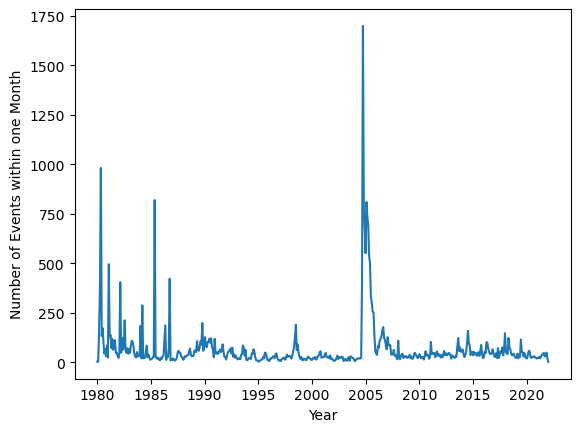

In [131]:
plt.plot(df_res)
plt.xlabel('Year')
plt.ylabel('Number of Events within one Month')

Text(0, 0.5, 'Number of Events per Month')

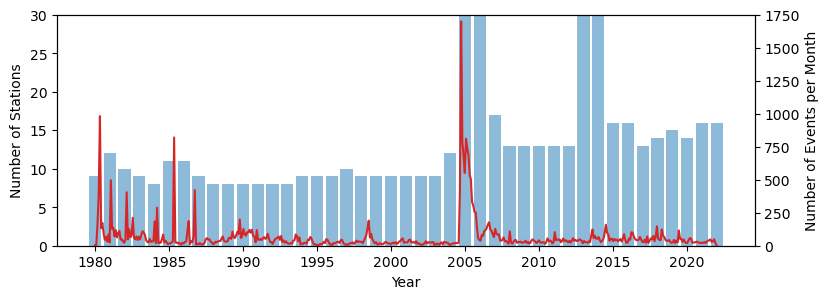

In [176]:
fig, ax = plt.subplots(figsize=(9,3))
ax1 = ax.twinx()
ax.bar(df_yr_new.index, df_yr_new['nr_stations'], width=300, alpha=0.5)
ax1.plot(df_res, 'C3')
ax.set_ylim(0,30)
ax1.set_ylim(0,1750)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Stations')
ax1.set_ylabel('Number of Events per Month')

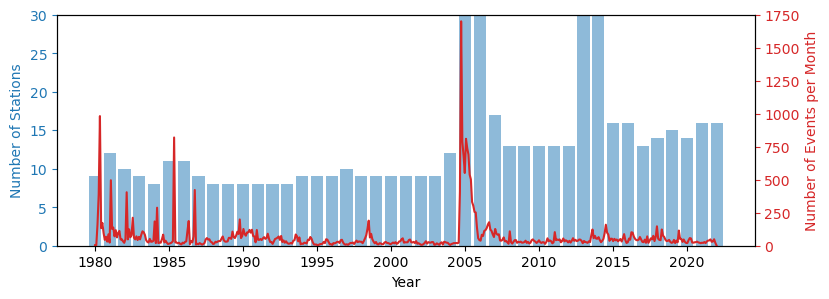

In [180]:
fig, ax = plt.subplots(figsize=(9,3))
ax1 = ax.twinx()
ax.bar(df_yr_new.index, df_yr_new['nr_stations'], width=300, alpha=0.5)
ax1.plot(df_res, 'C3')

ax.set_ylim(0,30)
ax1.set_ylim(0,1750)

ax.set_xlabel('Year')
ax.set_ylabel('Number of Stations')
ax1.set_ylabel('Number of Events per Month')

ax.yaxis.label.set_color('C0')
ax1.yaxis.label.set_color('C3')

ax.tick_params(axis='y', colors='C0')
ax1.tick_params(axis='y', colors='C3')

plt.savefig('nb_stations_events.png', dpi=300, bbox_inches='tight')